In [1]:
import sqlite3

In [2]:
# Step 1: Create connection
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
# Step 2: Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")


In [4]:
# Step 3: Insert sample data
sample_data = [
    ('Apple', 10, 2.5),
    ('Banana', 20, 1.0),
    ('Orange', 15, 1.5),
    ('Apple', 5, 2.5),
    ('Banana', 10, 1.0),
    ('Orange', 5, 1.5)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()


In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt



In [6]:
# Step 1: Connect to DB
conn = sqlite3.connect("sales_data.db")

In [7]:
# Step 2: SQL Query for summary
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

In [8]:
# Step 3: Read results into pandas
df = pd.read_sql_query(query, conn)
print("Sales Summary:\n", df)

# Step 4: Close connection
conn.close()


Sales Summary:
   product  total_qty  revenue
0   Apple         15     37.5
1  Banana         30     30.0
2  Orange         20     30.0


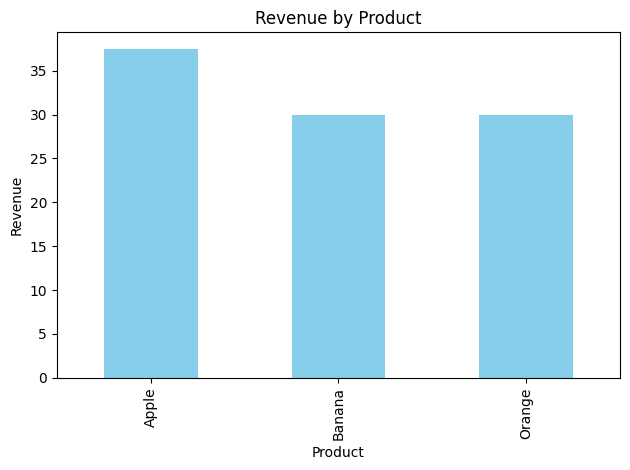

In [9]:
# Step 5: Bar Chart
df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False, color='skyblue')
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.tight_layout()

# Step 6: Save the chart (optional)
plt.savefig("sales_chart.png")

# Step 7: Show chart
plt.show()
